# Dataset exploration

The goal of this part is to explore the dataset. 

## 0. Load libraries and usefull functions

In [29]:
from pathlib import Path
import sys, os
from cadot.utils.path import add_src_to_sys_path
add_src_to_sys_path()

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from collections import Counter

from cadot.utils.path import get_data_path
from cadot.data.loading import load_yolo_annotations

In [30]:
path_data = get_data_path()
print(path_data)
split = 'train' # choose 'train' or 'valid'
images_paths = sorted((path_data / "images" / split).glob("*.jpg"))

classes = ['Basketball Field', 'Building', 'Crosswalk', 'Football Field',
           'Graveyard', 'Large Vehicle', 'Medium Vehicle', 'Playground',
           'Roundabout', 'Ship', 'Small Vehicle', 'Swimming Pool',
           'Tennis Court', 'Train'
           ]

/Users/karelmetaireau/projet_deep_learning/material-acceleration/DataCadot_yolo


## 1. Explore classes

In [31]:
category_counts = Counter()
all_label_paths = sorted((path_data / "labels" / split).glob("*.txt"))

for label_path in all_label_paths:
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 5:
                class_id = int(parts[0])
                class_name = classes[class_id] if class_id < len(classes) else f"class_{class_id}"
                category_counts[class_name] += 1

In [32]:
# Print statistics
print(f"\nDataCadot dataset statistics ({split.capitalize()} split):")
print(f"Total images: {len(images_paths)}")
print(f"Total label files: {len(all_label_paths)}")

print(f"\nCategory distribution in {split.capitalize()} set:")
if category_counts:
    for class_name, count in sorted(category_counts.items()):
        print(f"  {class_name}: {count}")
else:
    print(f"  No annotations found")

print(f"\nTotal annotations: {sum(category_counts.values())}")



DataCadot dataset statistics (Train split):
Total images: 3234
Total label files: 3234

Category distribution in Train set:
  Basketball Field: 15
  Building: 30764
  Crosswalk: 3751
  Football Field: 77
  Graveyard: 130
  Large Vehicle: 841
  Medium Vehicle: 3865
  Playground: 44
  Roundabout: 37
  Ship: 300
  Small Vehicle: 35149
  Swimming Pool: 60
  Tennis Court: 98
  Train: 67

Total annotations: 75198


## 2. Inspect dataset

We plot a sample of images and the bounding boxes with the class. The plot is done on the first 12 images in this example. 

In [33]:
# Import only a sample of the whole data set for visualization
images_paths_sample = sorted((path_data / "images" / split).glob("*.jpg"))[:12]

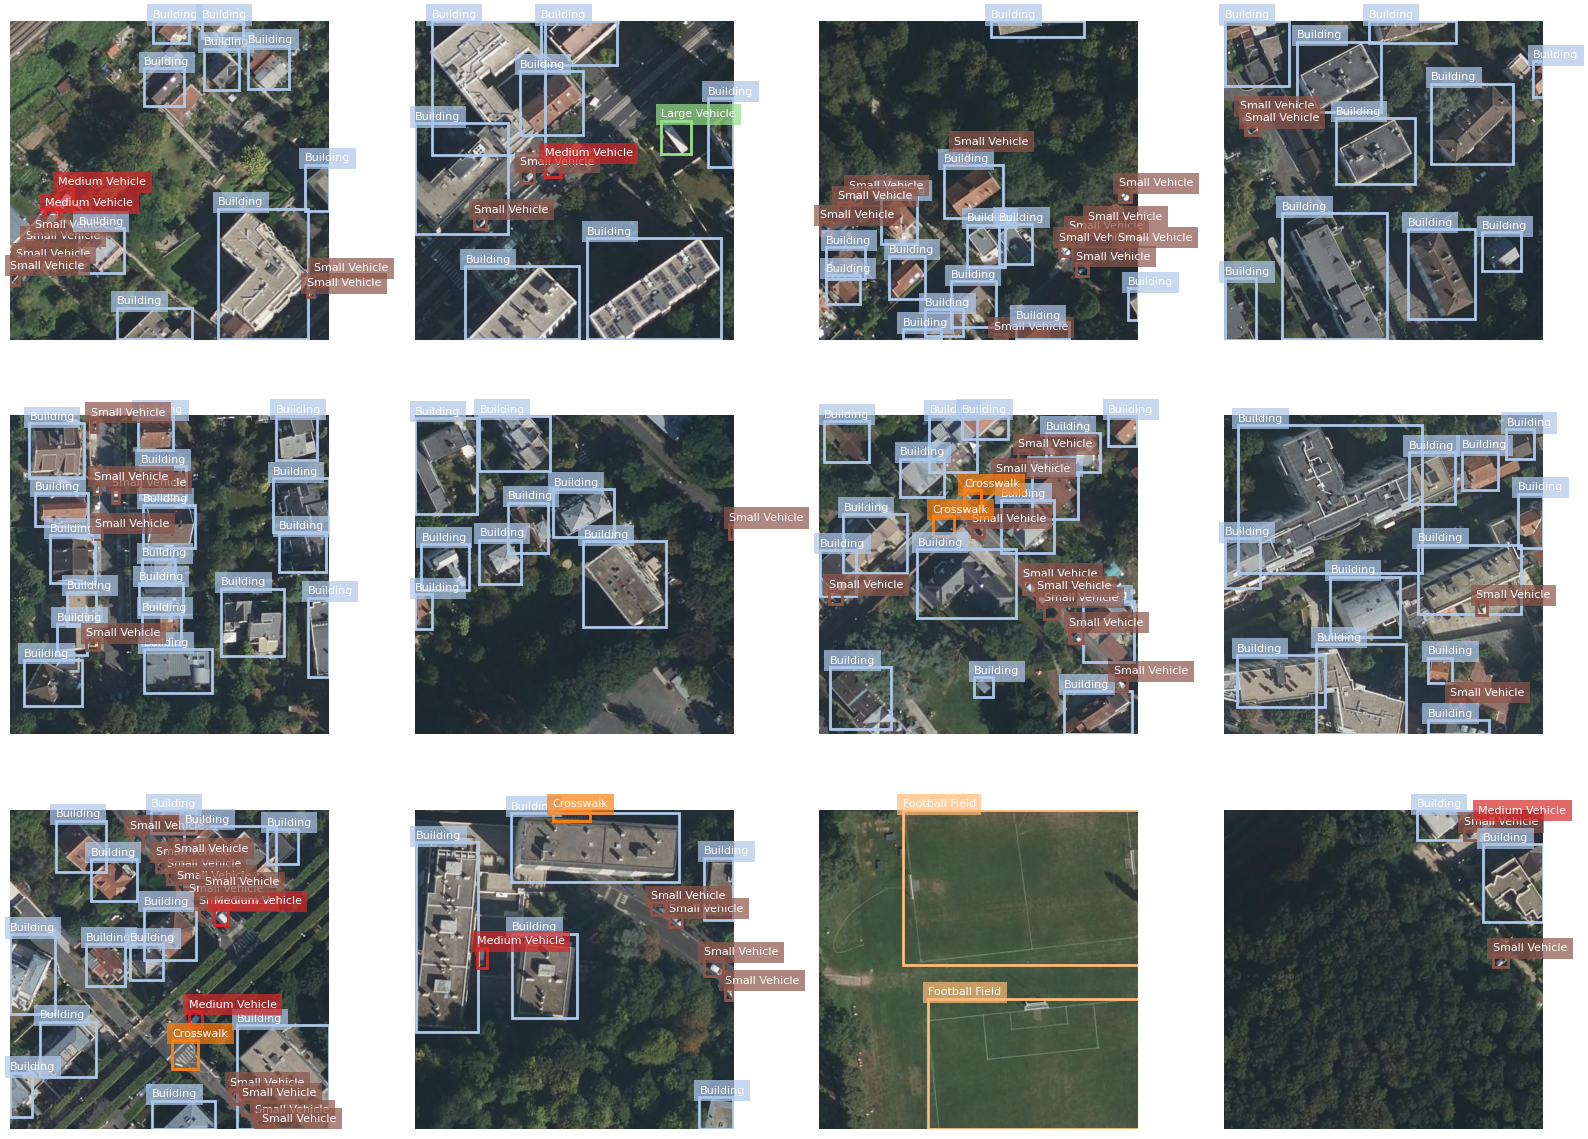

In [38]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

colors = plt.cm.tab20.colors # color map for different classes

for idx, img_path in enumerate(images_paths_sample):
    if idx >= len(axes):
        print("error1")
        break

    ax = axes[idx]
    img = Image.open(img_path)
    img_width, img_height = img.size
    ax.imshow(img)

    # Get the corresponding label file
    img_filename = os.path.basename(img_path)
    label_filename = os.path.splitext(img_filename)[0] + '.txt'
    label_path = path_data / "labels" / split / label_filename # cheker cette ligne

    # Load annotations
    annotations = load_yolo_annotations(label_path, img_width, img_height)

    # Draw bounding boxes
    for ann in annotations:
        bbox = ann['bbox']
        x, y, w, h = bbox
        class_id = ann['class_id']
        class_name = classes[class_id] if class_id < len(classes) else f"class_{class_id}"

        color = colors[class_id % len(colors)]
        
        # Create rectangle
        rect = patches.Rectangle((x, y), w, h, linewidth=2,
                                 edgecolor=color, facecolor='none')
        ax.add_patch(rect)
        # Add label to the patch
        ax.text(x, y-5, class_name, color='white', fontsize=8,
                bbox=dict(facecolor=color, alpha=0.7, edgecolor='none'))
    # ax.set_title()    
    ax.axis('off')

plt.tight_layout()
plt.show()